In [1]:
import pandas as pd
from fbprophet import Prophet
%matplotlib inline

In [4]:
df=pd.read_csv('HospitalityEmployees.csv')

In [5]:
df.head()

,Date,Employees
0,1/1/1990,1064.5
1,2/1/1990,1074.5
2,3/1/1990,1090.0
3,4/1/1990,1097.4
4,5/1/1990,1108.7


In [8]:
df.rename(columns={'Date':'ds','Employees':'y'},inplace=True)
# Rename Columns for Prophet

In [21]:
df.head()

,ds,y
0,1990-01-01,1064.5
1,1990-02-01,1074.5
2,1990-03-01,1090.0
3,1990-04-01,1097.4
4,1990-05-01,1108.7


In [9]:
df['ds']=pd.to_datetime(df['ds'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 2 columns):
ds    348 non-null datetime64[ns]
y     348 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.5 KB


In [11]:
# Plotly visualization
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

import cufflinks as cf

# For Notebooks
init_notebook_mode(connected=True)

# For offline use
cf.go_offline()

4.5.0


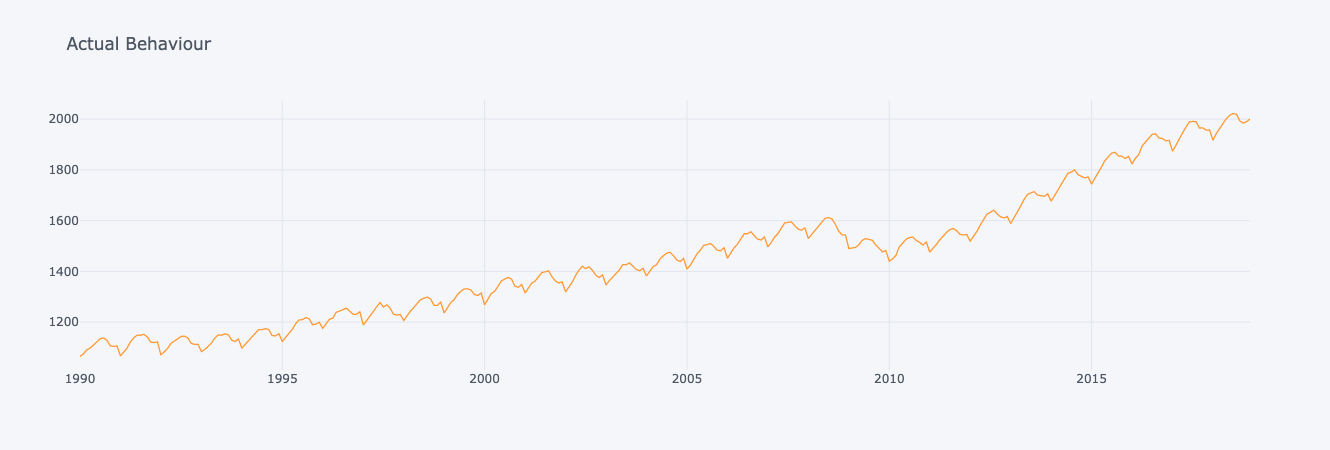

In [12]:
df.iplot(kind='line',x='ds',title='Actual Behaviour')

## Test Train Test

In [23]:
# Lets divide the train and test data. We will task last 12 data points as test data

In [14]:
len(df)

348

In [23]:
train = df.iloc[:336]
test = df.iloc[336:]

## Prophet Model 

In [24]:
m=Prophet()
m.fit(train)
future=m.make_future_dataframe(periods=12,freq='MS')
forecast=m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


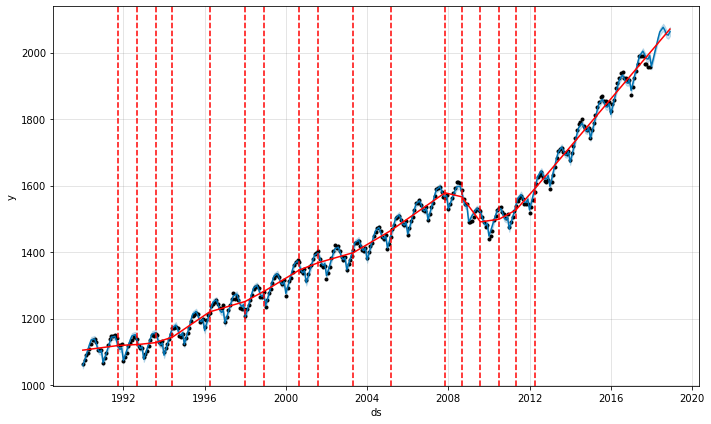

In [25]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a=add_changepoints_to_plot(fig.gca(),m,forecast)

In [28]:
forecast2=forecast.iloc[336:]

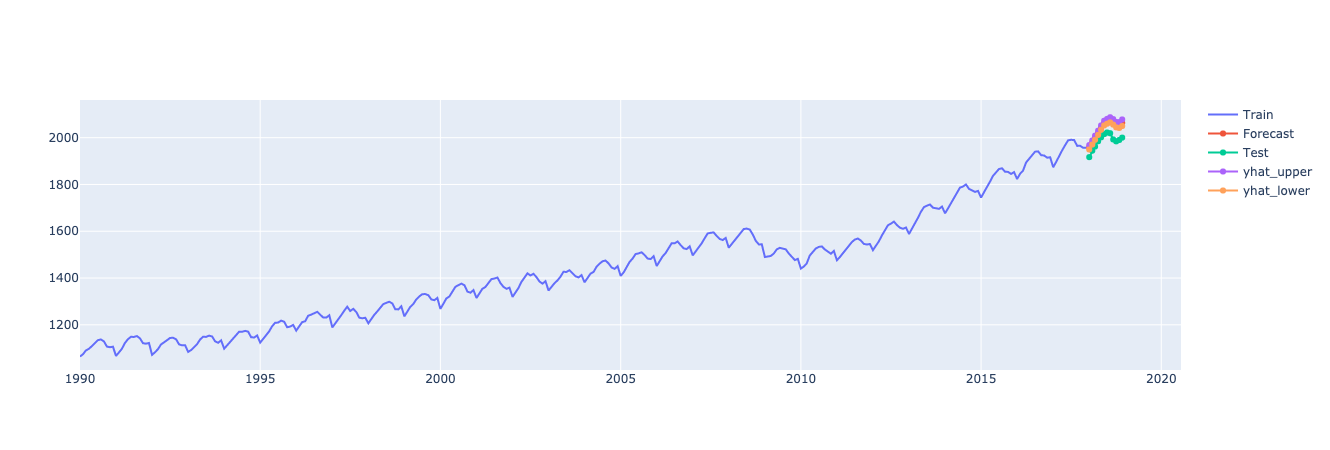

In [29]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=train['ds'],
        y=train['y'],
        name='Train'
    ))

fig.add_trace(
    go.Scatter(
        x=forecast2['ds'],
        y=forecast2['yhat'],
        name='Forecast'
    ))
fig.add_trace(
    go.Scatter(
        x=test['ds'],
        y=test['y'],
        name='Test'
    ))
fig.add_trace(
    go.Scatter(
        x=forecast2['ds'],
        y=forecast2['yhat_upper'],
        name='yhat_upper'
    ))
fig.add_trace(
    go.Scatter(
        x=forecast2['ds'],
        y=forecast2['yhat_lower'],
        name='yhat_lower'
    ))

fig.show()

# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iplot(kind='line',x='ds',title='Actual Behaviour')
# train.iplot(kind='line',x='ds',title='Actual Behaviour')

In [31]:
forecast2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
336,2018-01-01,2005.070183,1949.535133,1968.335781,2005.070183,2005.070183,-46.200827,-46.200827,-46.200827,-46.200827,-46.200827,-46.200827,0.0,0.0,0.0,1958.869356
337,2018-02-01,2011.194940,1970.582169,1988.265876,2011.194940,2011.194940,-31.891304,-31.891304,-31.891304,-31.891304,-31.891304,-31.891304,0.0,0.0,0.0,1979.303636
338,2018-03-01,2016.726979,1990.921102,2008.563503,2016.726979,2016.726979,-17.426607,-17.426607,-17.426607,-17.426607,-17.426607,-17.426607,0.0,0.0,0.0,1999.300372
339,2018-04-01,2022.851736,2011.711162,2029.931109,2022.745205,2023.293435,-2.265516,-2.265516,-2.265516,-2.265516,-2.265516,-2.265516,0.0,0.0,0.0,2020.586220
340,2018-05-01,2028.778920,2033.633426,2052.306528,2028.062986,2029.921787,14.049083,14.049083,14.049083,14.049083,14.049083,14.049083,0.0,0.0,0.0,2042.828004


In [33]:
from statsmodels.tools.eval_measures import rmse

predictions = forecast.iloc[-12:]['yhat']

rmse(test['y'],predictions)

52.80130407970333

In [34]:
test.mean()

y    1986.125
dtype: float64